
Total reward: 2425
Number of times each ad was selected: [610, 162, 114, 114, 7714, 82, 103, 889, 97, 115]
Total rewards for each ad: [92, 25, 8, 15, 2071, 2, 7, 185, 10, 10]


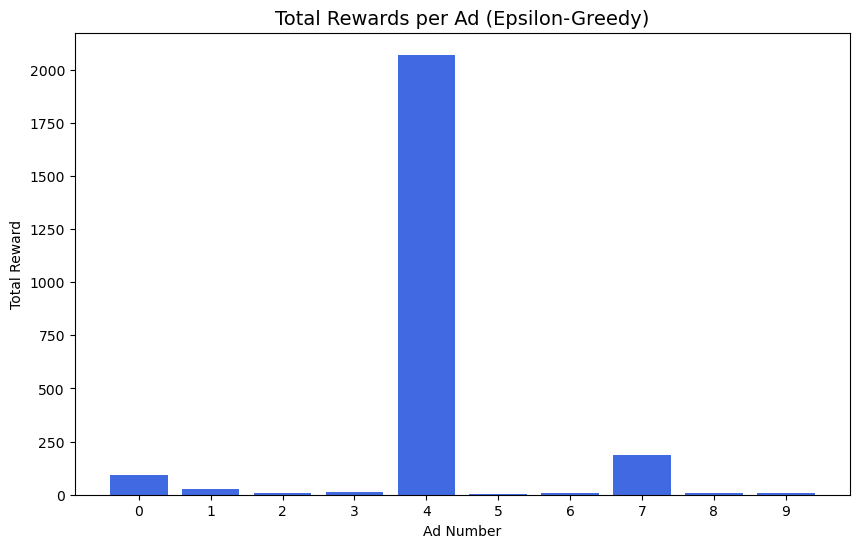

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


data = pd.read_csv("Ads_CTR_Optimisation.csv")


N = len(data)          
d = len(data.columns)   
epsilon = 0.1           


ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0


for n in range(N):
    if random.random() > epsilon:
     
        ad = np.argmax([sums_of_rewards[i] / numbers_of_selections[i] 
                        if numbers_of_selections[i] > 0 else 0 
                        for i in range(d)])
    else:
     
        ad = random.randrange(d)
    
    reward = data.values[n, ad]
    numbers_of_selections[ad] += 1
    sums_of_rewards[ad] += reward
    total_reward += reward
    ads_selected.append(ad)


print(f"\nTotal reward: {total_reward}")
print(f"Number of times each ad was selected: {numbers_of_selections}")
print(f"Total rewards for each ad: {sums_of_rewards}")


plt.figure(figsize=(10,6))
plt.bar(range(d), sums_of_rewards, color='royalblue')
plt.title("Total Rewards per Ad (Epsilon-Greedy)", fontsize=14)
plt.xlabel("Ad Number")
plt.ylabel("Total Reward")
plt.xticks(range(d))
plt.show()
